# Data preprocess internship


In [1]:
import os
import random
import json
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np


def get_java_files(base_path):
    """Recursively collect all .java files from the given directory."""
    return list(Path(base_path).rglob("*.java"))


def extract_code_samples(files, max_num_samples=51, min_chars_before=300, max_chars=200, seed=42):
    """
    Extracts code samples by splitting files into prefix, middle, and suffix.
    
    Parameters:
    - files: List of file paths to process.
    - max_num_samples: Max number of samples to extract.
    - min_chars_before: Minimum number of characters before the missing code.
    - max_chars: Maximum length of the missing code.
    - seed: Random seed for reproducibility.
    
    Returns:
    - samples: A list of dictionaries containing prefix, middle, and suffix.
    - positions: A list of tuples containing (start, end, total length) for analysis.
    """

    random.seed(seed)

    samples = []
    positions = []

    random.shuffle(files)

    for i in range(max_num_samples):

        with open(files[i], "r", encoding="utf-8") as f:
            content = f.read()
            if len(content) < min_chars_before+max_chars:
                print(f"File {files[i]} is too short for the specified parameters.")
                i = i - 1

                continue

            start = random.randint(min_chars_before, max(0, len(content) - max_chars))
            end = min(start + random.randint(0, max_chars), len(content))

            prefix = content[:start]
            middle = content[start:end]
            suffix = content[end:]

            samples.append({"filename": str(files[i]), "prefix": prefix, "middle": middle, "suffix": suffix})

            positions.append((start, end, len(content)))

    return samples, positions


repo_path = os.path.expanduser("data/member")
java_files = get_java_files(repo_path)


code_samples, positions = extract_code_samples(java_files)

File data/member/repository/RoomRepository.java is too short for the specified parameters.
File data/member/repository/LanguageRepository.java is too short for the specified parameters.
File data/member/business/exception/MemberCannotCheckIdentityException.java is too short for the specified parameters.
File data/member/dto/LanguageCreateDto.java is too short for the specified parameters.
File data/member/dto/RoleDto.java is too short for the specified parameters.
File data/member/repository/RoleRepository.java is too short for the specified parameters.
File data/member/domain/enums/BlockAccessTypeEnum.java is too short for the specified parameters.
File data/member/domain/enums/DormitoryEnum.java is too short for the specified parameters.
File data/member/dto/RoomResponseDto.java is too short for the specified parameters.
File data/member/dto/RoleAssignmentResponseDto.java is too short for the specified parameters.


Save samples to file


In [ ]:
with open("data/preprocess_and_result_data/data_pre_process.json", "w", encoding="utf-8") as f:
    json.dump(code_samples, f, indent=4)

Display sample graphs


In [3]:
def plot_positions(positions):

    abs_lengths = [e - s for s, e, _ in positions]
    absolute_chars_before = [s for s, _, _ in positions]
    absolute_chars_after = [l - e for _, e, l in positions]

    sample_indices = np.arange(1, len(positions) + 1)
    width = 0.3

    plt.figure(figsize=(20, 6))
    plt.bar(
        sample_indices - 1.5 * width,
        abs_lengths,
        width,
        label="Middle Section Length",
        color="blue",
    )
    plt.bar(
        sample_indices - width / 2,
        absolute_chars_before,
        width,
        label="Start Position",
        color="green",
    )
    plt.bar(
        sample_indices + width / 2,
        absolute_chars_after,
        width,
        label="End Position",
        color="red",
    )

    plt.xlabel("Sample Index")

    plt.ylabel("Character Position (log scale)")

    plt.title("Start and End Character Positions in Code Samples")

    plt.yscale("log")

    plt.xticks(sample_indices)
    plt.grid(True, which="both", ls="-", alpha=0.5)

    plt.legend()

    plt.show()

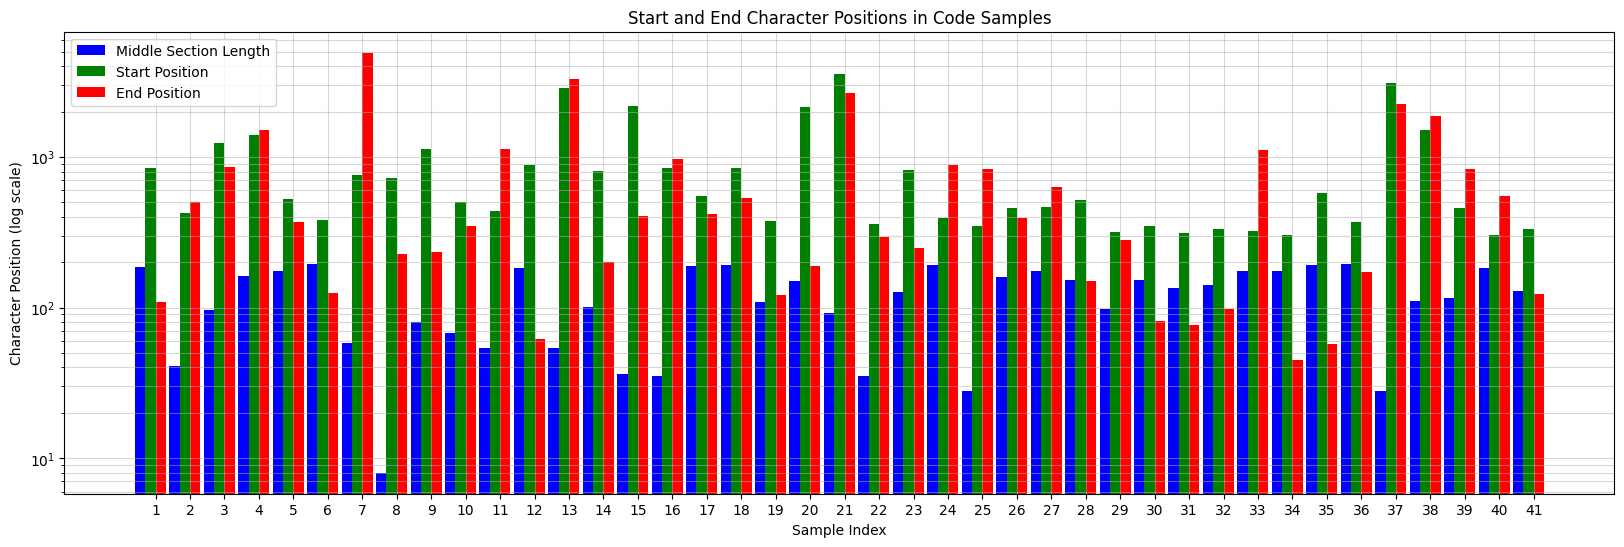

In [4]:
plot_positions(positions)